# Máquinas de soporte vectorial
## Lectura de datos

In [2]:
import pandas as pd
from pandas import Series,DataFrame

setInicial=pd.read_csv('Vinos.csv')

#Recuperar nombres de las columnas de los atributos y la clase
atributosName=setInicial.columns[:-1]
atributoClase=setInicial.columns[-1]
print(atributoClase)
print(atributosName)

#Datos de los atributos
dataGral=setInicial[atributosName]

#Datos de la clase (vector de elementos reales)
claseGral=setInicial[atributoClase]

#Instancias por clase
print(claseGral.value_counts())


Clase
Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')
Clase
Calidad_5    681
Calidad_7    199
Name: count, dtype: int64


## Generar un solo modelo
Entrenamiento

In [3]:
from sklearn import svm

################## Clasificador ######################
clasificador = svm.SVC(C=1)

################## Modelo ###########################
modelo = clasificador.fit(dataGral, claseGral)

Clasificación (predicción)

In [4]:
setPredic=pd.DataFrame({'fixed acidity':[7.4, 7.5, 7.9],
                        'volatile acidity':[0.5, 0.49, 0.6], 
                        'citric acid':[0, 0.11, 0.21], 
                        'residual sugar':[1.9, 1.8, 2.2],
                        'chlorides':[0.17, 0.066, 0.106], 
                        'free sulfur dioxide':[7, 10, 25], 
                        'total sulfur dioxide':[145, 71, 37], 
                        'density':[0.9966, 0.9964, 0.9978],
                        'pH':[3.11, 3.17, 3.28], 
                        'sulphates':[1.28, 0.83, 1.2], 
                        'alcohol':[9.2, 8, 10]})

#Instancias por clase
print(setPredic)

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.50         0.00             1.9      0.170   
1            7.5              0.49         0.11             1.8      0.066   
2            7.9              0.60         0.21             2.2      0.106   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    7                   145   0.9966  3.11       1.28   
1                   10                    71   0.9964  3.17       0.83   
2                   25                    37   0.9978  3.28       1.20   

   alcohol  
0      9.2  
1      8.0  
2     10.0  


In [5]:
#Asignar clase
Clases=modelo.predict(setPredic)
print(Clases)

['Calidad_5' 'Calidad_5' 'Calidad_5']


In [6]:
predictExp2=modelo.predict(dataGral)
predictExp2

print(len(claseGral), len(predictExp2))

Aciertos=0
for x in range(len(claseGral)):
    if claseGral[x]==predictExp2[x]:
        Aciertos+=1

print(Aciertos, len(claseGral)-Aciertos)

880 880
683 197


## Separación de conjuntos
Entrenamiento

In [8]:
from sklearn.model_selection import train_test_split

#Separar los datos
valoresTrain, valoresTest, clasesTrain, clasesTest= \
train_test_split(dataGral, claseGral, test_size=0.30)

print(len(valoresTrain), len(valoresTest))

valoresTrain.head()


616 264


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
564,6.1,0.590,0.01,2.1,0.056,5.0,13.0,0.99472,3.52,0.56,11.4
257,15.5,0.645,0.49,4.2,0.095,10.0,23.0,1.00315,2.92,0.74,11.1
133,7.0,0.420,0.35,1.6,0.088,16.0,39.0,0.99610,3.34,0.55,9.2
139,8.1,0.725,0.22,2.2,0.072,11.0,41.0,0.99670,3.36,0.55,9.1
335,8.4,1.035,0.15,6.0,0.073,11.0,54.0,0.99900,3.37,0.49,9.9


Clasificación (evaluación)

In [9]:
from sklearn.metrics import accuracy_score

from sklearn import svm

################## Clasificador ######################
clasificador = svm.SVC(C=1)

################## Modelo ###########################
modelo = clasificador.fit(valoresTrain, clasesTrain)

predict = modelo.predict(valoresTest)
predictTrain=modelo.predict(valoresTrain)

print("Conjunto de evaluación: ",accuracy_score(clasesTest,predict))
print("Conjunto de entrenamiento: ",accuracy_score(clasesTrain,predictTrain))


Conjunto de evaluación:  0.7689393939393939
Conjunto de entrenamiento:  0.7792207792207793


## Overfitting y underfitting

[0.7689393939393939, 0.7689393939393939, 0.7689393939393939, 0.7689393939393939, 0.7878787878787878, 0.7954545454545454, 0.8068181818181818, 0.8106060606060606, 0.8257575757575758, 0.8409090909090909, 0.8409090909090909, 0.8371212121212122, 0.8333333333333334, 0.8333333333333334, 0.8371212121212122, 0.8371212121212122, 0.8371212121212122, 0.8371212121212122, 0.8371212121212122, 0.8371212121212122, 0.8409090909090909, 0.8409090909090909, 0.8484848484848485, 0.8522727272727273, 0.8522727272727273, 0.8560606060606061, 0.8560606060606061, 0.8560606060606061, 0.8484848484848485]
[0.7792207792207793, 0.7792207792207793, 0.7792207792207793, 0.7808441558441559, 0.8116883116883117, 0.8262987012987013, 0.8425324675324676, 0.8555194805194806, 0.862012987012987, 0.862012987012987, 0.8668831168831169, 0.8636363636363636, 0.8603896103896104, 0.8603896103896104, 0.862012987012987, 0.862012987012987, 0.862012987012987, 0.8685064935064936, 0.8701298701298701, 0.8717532467532467, 0.8717532467532467, 0.8

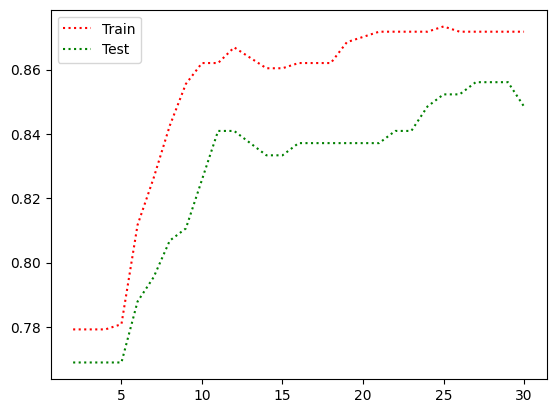

In [10]:
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score

from sklearn.tree import DecisionTreeClassifier

prof=[2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30]

Train=[]
Test=[]

################## Clasificador ######################

################## Modelo ###########################
for x in prof:
    clasificador = svm.SVC(C=x)    
    modelo = clasificador.fit(valoresTrain, clasesTrain)
    predict = modelo.predict(valoresTest)
    predictTrain=modelo.predict(valoresTrain)
    
    Test.append(accuracy_score(clasesTest,predict))
    Train.append(accuracy_score(clasesTrain,predictTrain))

print(Test)
print(Train)

plt.plot(prof, Train, label='Train', color='red', linestyle='dotted')
plt.plot(prof,Test, label='Test', color='green', linestyle='dotted')
plt.legend()


In [13]:
%%shell
jupyter nbconvert --to html 2_1_Arbol.ipynb

UsageError: Cell magic `%%shell` not found.
